In [79]:
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
coco_1 = pd.read_csv('prices_round_4_day_1.csv', sep=";")
coco_2 = pd.read_csv('prices_round_4_day_2.csv', sep=";")
coco_3 = pd.read_csv('prices_round_4_day_3.csv', sep=";")

all_days = pd.concat([coco_1, coco_2, coco_3], ignore_index=True)
all_days.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0


In [81]:
all_coconut = all_days[all_days['product'] == "COCONUT"]
all_coconut = all_coconut.reset_index()
all_coupon = all_days[all_days['product'] == "COCONUT_COUPON"]
all_coupon = all_coupon.reset_index()
# print(len(all_coconut.index), len(all_coupon.index))
# all_coconut.head()
# all_coupon.head()

In [82]:
mid_prices = pd.DataFrame()
mid_prices["COCONUT"] = all_coconut['mid_price']
mid_prices["COUPON"] = all_coupon['mid_price']
mid_prices.corr()
# mid_prices.head()

,COCONUT,COUPON
COCONUT,1.000000,0.957869
COUPON,0.957869,1.000000


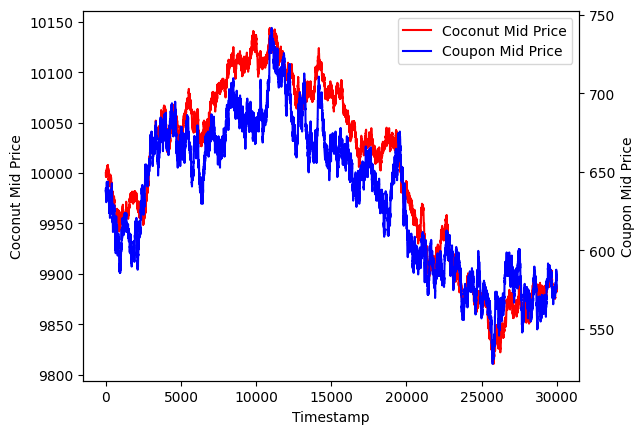

In [83]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

coconut_line = ax1.plot(mid_prices["COCONUT"], label="Coconut Mid Price", color="RED")
coupon_line = ax2.plot(mid_prices["COUPON"], label="Coupon Mid Price", color="BLUE")

ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Coconut Mid Price")
ax2.set_ylabel("Coupon Mid Price")

lns = coconut_line + coupon_line
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="best")
plt.show()

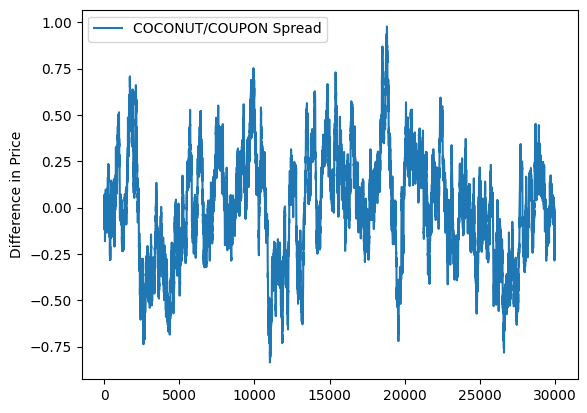

In [86]:
mid_price_z = pd.DataFrame()
for col in mid_prices.columns:
    mid_price_z[col] = (mid_prices[col] - mid_prices[col].mean())/mid_prices[col].std()
mid_price_z.head()
plt.plot(mid_price_z["COCONUT"] - mid_price_z["COUPON"], label="COCONUT/COUPON Spread")
plt.ylabel("Difference in Price")
plt.legend(loc="best")
plt.show()